In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('eda_data.csv')

In [4]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min salary', 'max salary',
       'Average Salary', 'Company_text', 'State', 'Same_state', 'Age',
       'python', 'spark', 'R', 'aws', 'excel', 'job_simp', 'seniority',
       'JD_len', 'CompetitorCount'],
      dtype='object')

In [5]:
#choose relevant columns
df_model =df[['Average Salary','Rating', 'Size','Type of ownership','Industry','Sector','Revenue','CompetitorCount',
           'hourly', 'employer_provided','State','Same_state','Age','python', 'spark', 'aws', 'excel',
           'job_simp', 'seniority','JD_len']]

In [6]:
df_dummies = pd.get_dummies(df_model)


In [12]:
#train test split
from sklearn.model_selection import train_test_split
x = df_dummies.drop('Average Salary', axis=1)
y = df_dummies['Average Salary'].values
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [17]:
#multiple linear regression
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score

lm = LinearRegression()
lm.fit(x_train,y_train)

np.mean(cross_val_score(lm,x_train,y_train,scoring='neg_mean_absolute_error',cv=3))

-20.766855128917353

In [34]:
#lasso regression, have an alpha value(by default alpha=1), to find a suitable alpha value e will loop thriugh a range of valures
lm_l=Lasso(alpha=0.13)
lm_l.fit(x_train,y_train)
np.mean(cross_val_score(lm_l,x_train,y_train,scoring='neg_mean_absolute_error',cv=3))

-19.25779807999977

In [20]:
#lasso with different alpha value
alpha=[]
error=[]
for i in range(0,100):
    alpha.append(i/100)
    lml=Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml,x_train,y_train,scoring='neg_mean_absolute_error',cv=3)))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 72290.7992407574, tolerance: 60.59305341772151
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/

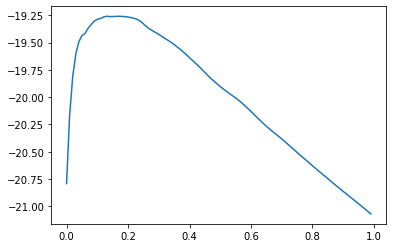

In [21]:
plt.plot(alpha,error)

In [25]:
#in order to check which alpha error gives us the best value.
err=tuple(zip(alpha,error))
df_err = pd.DataFrame(err,columns=['alpha','error'])
df_err[df_err.error==max(df_err.error)]

,alpha,error
13,0.13,-19.257798


In [27]:
#random forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
np.mean(cross_val_score(rf,x_train,y_train,scoring='neg_mean_absolute_error',cv=3))

-14.948484335743217

In [29]:
#tune models gridsearch, run all the model and gives out the best one
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':(10,300,10),'criterion':('mse','mae'),'max_features':('auto','sqrt','log2')}

gs=GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=3)
gs.fit(x_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [31]:
gs.best_score_

-14.893094281791406

In [37]:
tpred_lm = lm.predict(x_test)
tpred_lm_l = lm_l.predict(x_test)
tpred_rf = gs.best_estimator_.predict(x_test)

In [40]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test,tpred_lm))
print(mean_absolute_error(y_test,tpred_lm_l))
print(mean_absolute_error(y_test,tpred_rf))

18.85518999021525
19.66530371274991
11.004854586129754
